# __Descomposicion de Valores Singulares (SVD)__

Es un metodo que surge de realizar la descomposicion de una matriz. Esta intimamente relacionado con el hecho de diagonalizar una matriz simetrica.

Su objetivo es lograr, a partir de la descomposicion de matrices, obtener la mejor aproximacion de la matriz de datos inicial almacenando la menor cantidad de datos posibles.

Ejemplo, si contamos con un set de datos de 50 features, lo que se busca es con menos cantidad de features representar lo mejor posible la variabilidad de los datos.

## Como se calcula

Supongamos que la matriz de datos original a la que vamos aplicar _SVD_ es $M$. Vamos a aprender como hacer la descomposicion de la matriz mediante la siguiente visualizacion:

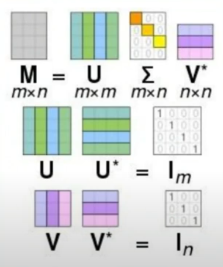

- Las columnas de la matriz $U$ son los autovectores de $M$ por $M$ traspuesto.

- Sigma ($\Sigma$) es la matiz mas importante. Es una matriz diagonal y sus valores son llamados valores singulares. Estos valores se calculan como la raiz cuadrada de los autovalores de $M$ traspuesto por $M$, ordenados decrecientemente.

- Las columnas de $V$ son los autovectores de $M$ traspuesto por $M$

## Obtener SVD de forma practica

In [1]:
# librerias
import matplotlib.pyplot as plt
import numpy as np
import time
from numpy.linalg import svd # metodo svd

Para el siguiente ejercicio hay que tener en cuenta los conceptos de _varianza_ y _bias_.

- La varianza mide que tan dispersos estan los datos
- El bias mide que tan acertados han sido los datos.

Vamos a usar SVD sobre una matriz dada, para ello creamos una funcion que calcule SVD y ademas nos arroje una visualizacion

In [2]:
vmin = 0
vmax = 1
image_bias = 1

def plot_svd(A):

    # longitud de A
    n=len(A)
    plt.imshow(image_bias-A, cmap='gray', vmin=vmin, vmax=vmax)
    print('Imagen formada con la matriz de datos')
    plt.show()

    U, S, V = svd(A)
    print('Matriz U: \n \n', U,'\n \n')
    print('Matriz Sigma: \n \n', S,'\n \n')
    print('Matriz V: \n \n', V,'\n \n')

    imgs = []
    for i in range(n):
        imgs.append(S[i]*np.outer(U[:,i],V[i]))

    combined_imgs = []
    for i in range(n):
        img = sum(imgs[:i+1])
        combined_imgs.append(img)

    fig, axes = plt.subplots(figsize=(n*n, n), nrows=1, ncols=n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias*imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
        ax.set_title(np.round(S[num],2), fontsize=60)
    plt.show()

    fig, axes = plt.subplots(figsize=(n*n, n), nrows=1, ncols=n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias*combined_imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()

    return U, S, V



Vamos a definir la matriz que vamos a utilizar

In [3]:
D = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0]
              ])

Pasamos la matriz _D_ a la funcion

Imagen formada con la matriz de datos


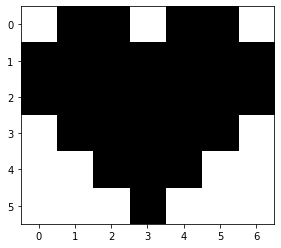

Matriz U: 
 
 [[ 3.61249460e-01 -4.38468638e-16  7.30296743e-01 -5.32180543e-02
  -2.63150853e-01  5.13891975e-01]
 [ 5.41874189e-01  3.53553391e-01 -2.73861279e-01 -7.98270815e-02
   6.29386561e-01  3.22292657e-01]
 [ 5.41874189e-01  3.53553391e-01 -2.73861279e-01 -7.98270815e-02
  -6.29386561e-01 -3.22292657e-01]
 [ 4.45394592e-01 -3.53553391e-01  2.73861279e-01  5.17967494e-01
   2.63150853e-01 -5.13891975e-01]
 [ 2.77104327e-01 -7.07106781e-01 -1.82574186e-01 -6.24403602e-01
   2.49800181e-16  1.62196645e-16]
 [ 8.41451321e-02 -3.53553391e-01 -4.56435465e-01  5.71185548e-01
  -2.63150853e-01  5.13891975e-01]] 
 

Matriz Sigma: 
 
 [4.73981604e+00 1.41421356e+00 1.41421356e+00 7.30851490e-01
 1.49190666e-16 1.82188799e-17] 
 

Matriz V: 
 
 [[ 2.28647772e-01  3.98832447e-01  4.57295545e-01  3.98832447e-01
   4.57295545e-01  3.98832447e-01  2.28647772e-01]
 [ 5.00000000e-01  2.50000000e-01 -2.50000000e-01 -5.00000000e-01
  -2.50000000e-01  2.50000000e-01  5.00000000e-01]
 [-3.8729833

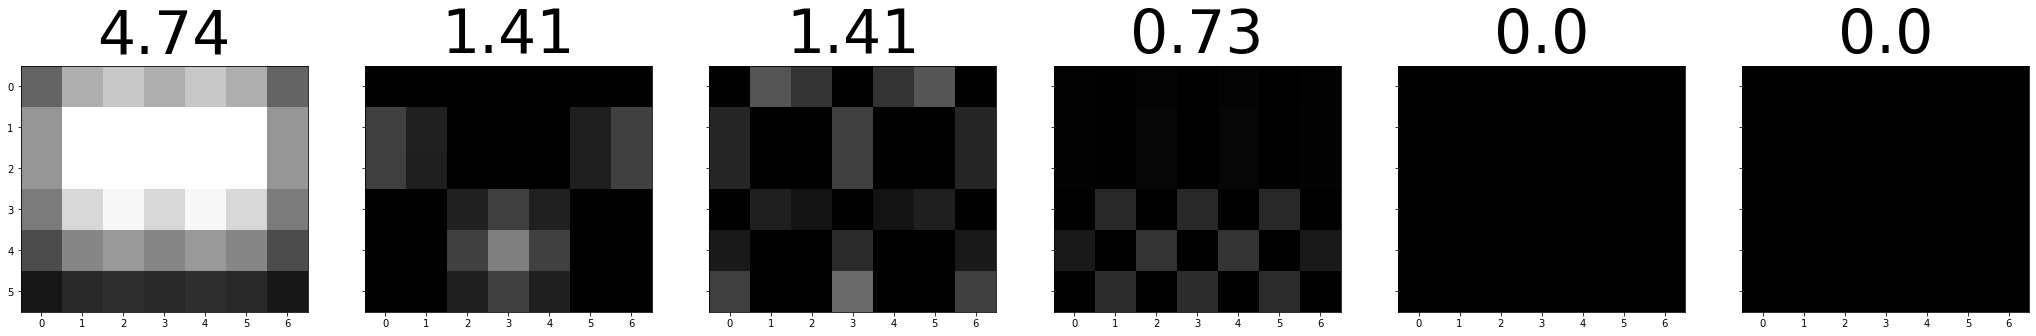

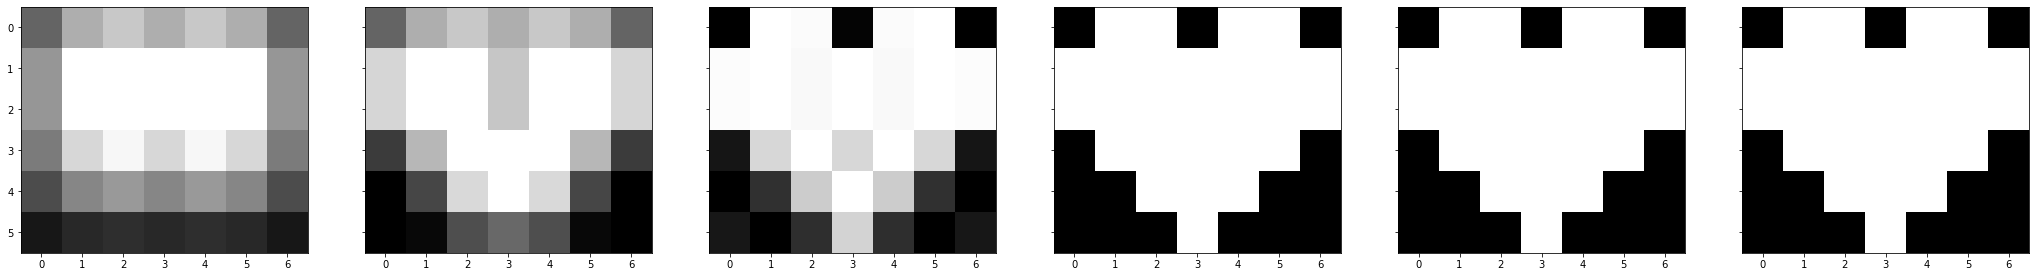

In [4]:
U, S, V = plot_svd(D)